In [121]:
import zipfile
import os
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.image as mpimg

In [122]:
# Specify the path to the ZIP file
zip_file_path = r"C:\Users\91750\Downloads\data.zip"  # Use the raw string (r) prefix for Windows paths

# Define the path for the extracted data
extracted_dir = 'extracted_data'

# Step 1: Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Step 2: Verify the extraction
print("Extracted files:", os.listdir(extracted_dir))


Extracted files: ['GHI', 'PR']


In [123]:
# Initialize lists to store the data
pr_data = []
ghi_data = []

# Walk through the extracted directory and process the files
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            
            # Check if the file belongs to PR or GHI based on the directory structure
            if 'PR' in root:
                pr_data.append(df)
            elif 'GHI' in root:
                ghi_data.append(df)

# Concatenate all DataFrames
pr_df = pd.concat(pr_data, ignore_index=True)
ghi_df = pd.concat(ghi_data, ignore_index=True)

# Display the merged DataFrames
print("PR Data:")
display(pr_df.head())

print("\nGHI Data:")
display(ghi_df.head())

PR Data:


,Date,PR
0,2019-07-01,69.575676
1,2019-07-02,79.314411
2,2019-07-03,61.020006
3,2019-07-04,83.262576
4,2019-07-05,82.124440



GHI Data:


,Date,GHI
0,2019-07-01,3.256608
1,2019-07-02,3.976767
2,2019-07-03,2.811867
3,2019-07-04,3.658408
4,2019-07-05,5.590683


In [124]:
# Save the merged DataFrames to CSV files
pr_df.to_csv('pr_data.csv', index=False)
ghi_df.to_csv('ghi_data.csv', index=False)
print("Preprocessed data saved to pr_data.csv and ghi_data.csv")

Preprocessed data saved to pr_data.csv and ghi_data.csv


# Merge the data into one csv file

In [125]:
fileghi = "C:\\Users\\91750\\Downloads\\Take Home Assignment\\ghi_data.csv"
filepr = "C:\\Users\\91750\\Downloads\\Take Home Assignment\\pr_data.csv"

In [126]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [127]:
merged_df = pd.merge(df1, df2, on='Date')
merged_df.to_csv('merged_file.csv', index=False)
print("Files merged successfully!")

Files merged successfully!


In [128]:
df3=pd.read_csv('merged_file.csv')
df3

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


# Data processing

In [129]:
df3.shape

(982, 3)

In [130]:
df3.ndim

2

In [131]:
df3.size

2946

In [132]:
df3.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [133]:
df3.tail(5)

,Date,GHI,PR
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149
981,2022-03-24,5.125050,79.911798


In [134]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    982 non-null    object 
 1   GHI     982 non-null    float64
 2   PR      982 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.1+ KB


In [135]:
df3.columns

Index(['Date', 'GHI', 'PR'], dtype='object')

In [136]:
df3.nunique()

Date    982
GHI     982
PR      982
dtype: int64

In [137]:
df3.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.629912,72.714933
std,1.024159,7.294222
min,1.413825,60.023886
25%,4.021665,66.309422
50%,4.737796,72.947945
75%,5.312283,79.111721
max,6.947317,84.980120


# Change the Datatype of Data column

In [138]:
df3['Date'] = pd.to_datetime(df3['Date'])

In [139]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    982 non-null    datetime64[ns]
 1   GHI     982 non-null    float64       
 2   PR      982 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 23.1 KB


# Handling Missing Value

In [140]:
df3.head(5)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [141]:
df3.isnull()

,Date,GHI,PR
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
977,False,False,False
978,False,False,False
979,False,False,False
980,False,False,False


In [142]:
df3.isnull().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [143]:
df3.notnull().sum()

Date    982
GHI     982
PR      982
dtype: int64

In [144]:
df3.dropna(inplace=True)

In [145]:
df3.fillna(method="ffill")

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149


# Sorting Data

In [146]:
df3 = df3.sort_values(by='Date')

# Data Visualization:

In [149]:
def plot_pr_vs_ghi(df3):

    # Calculate 30-day moving average of PR
    df3['PR_MA_30'] = df3['PR'].rolling(window=30).mean()

    # Determine the years in the data for budget line calculation
    df3['Year'] = df3['Date'].dt.year

    # Generate the dynamic budget line
    start_value = 73.9
    annual_decrease = 0.8 / 100
    budget_line = start_value * (1 - annual_decrease) ** (df3['Year'] - df3['Year'].min())
    df3['Budget_PR'] = budget_line

    # Color code for GHI values
    def color_code(ghi):
        if ghi < 2:
            return '< 2'
        elif 2 <= ghi < 4:
            return '2 <= 4'
        elif 4 <= ghi < 6:
            return '4 <= 6'
        else:
            return '> 6'

    df3['GHI_Color'] = df3['GHI'].apply(color_code)

    # Plotting
    plt.figure(figsize=(14, 8))
    
    # Scatter plot of PR with color coding based on GHI
    sns.scatterplot(data=df3, x='Date', y='PR', hue='GHI_Color',palette=['brown','navy', 'lightblue', 'orange'], edgecolor='black', s=50)
    
    # Plot the 30-day moving average of PR
    plt.plot(df3['Date'], df3['PR_MA_30'], color='red', label='30-d Moving Avg PR', linewidth=2)

    # Plot the budget line
    plt.plot(df3['Date'], df3['Budget_PR'], color='darkgreen', linestyle='--', label='Budget PR', linewidth=2)

    # Calculate and display summary statistics in the bottom right corner
    last_7_days_avg = df3['PR'].tail(7).mean()
    last_30_days_avg = df3['PR'].tail(30).mean()
    last_60_days_avg = df3['PR'].tail(60).mean()
    last_90_days_avg = df3['PR'].tail(90).mean()
    last_365_days_avg = df3['PR'].tail(365).mean()
    last_Lifetime_days_avg = df3['PR'].tail(982).mean()

    
    textstr = '\n'.join((
        f'Last 7 Days Avg PR: {last_7_days_avg:.2f}',
        f'Last 30 Days Avg PR: {last_30_days_avg:.2f}',
        f'Last 60 Days Avg PR: {last_60_days_avg:.2f}',
        f'Last 90 Days Avg PR: {last_90_days_avg:.2f}',
        f'Last 365 Days Avg PR: {last_365_days_avg:.2f}',
        f'Last Lifetime Days Avg PR: {last_Lifetime_days_avg:.2f}',))

    # Display text box
    plt.text(0.98, 0.02, textstr, fontsize=12, verticalalignment='bottom', horizontalalignment='right',
             transform=plt.gca().transAxes,
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='lightgrey'))

    # Customize plot
    plt.title('PR vs GHI Visualization')
    plt.xlabel('Date')
    plt.ylabel('PR (Performance Ratio)')
    plt.legend(loc='upper right')
    plt.savefig("take_home_plot",dpi=1000, facecolor="g")
    plt.grid(True)

    plt.show()

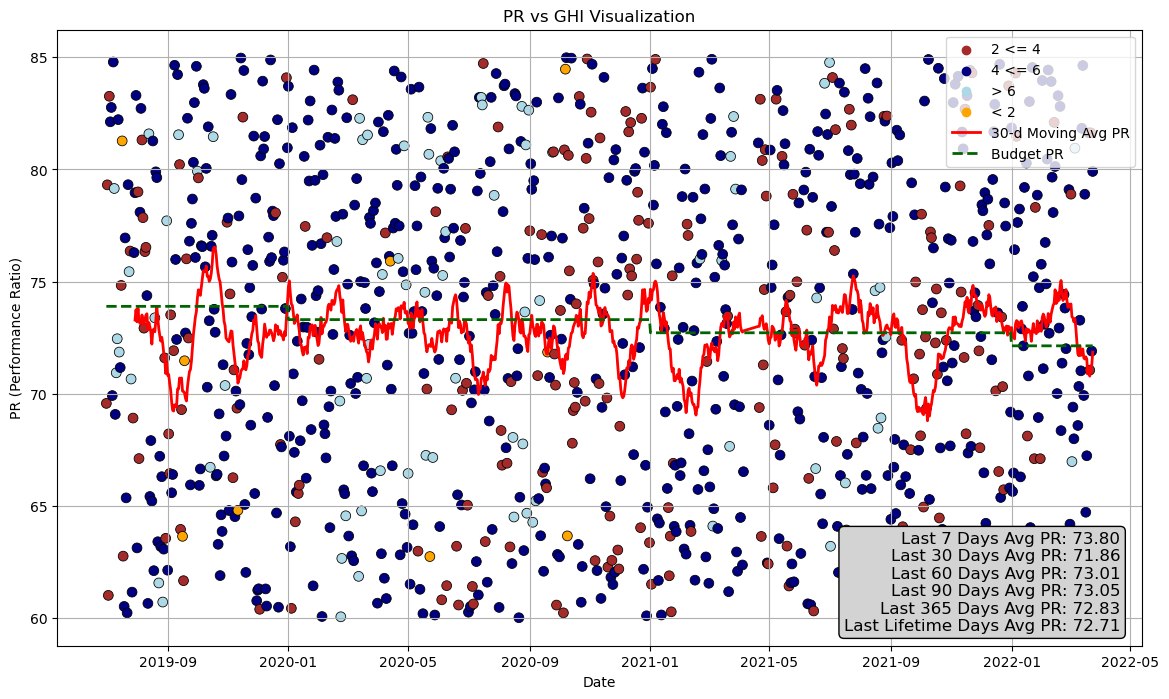

In [150]:
plot_pr_vs_ghi(df3)

# THANK YOU